In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/Churn_Modelling - Churn_Modelling.csv')
df = data.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.isnull().sum().to_frame('No. of Nulls')

,No. of Nulls
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [8]:
df.dtypes.to_frame('Data Type')

,Data Type
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.describe(include='O')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


<Axes: xlabel='Geography', ylabel='count'>

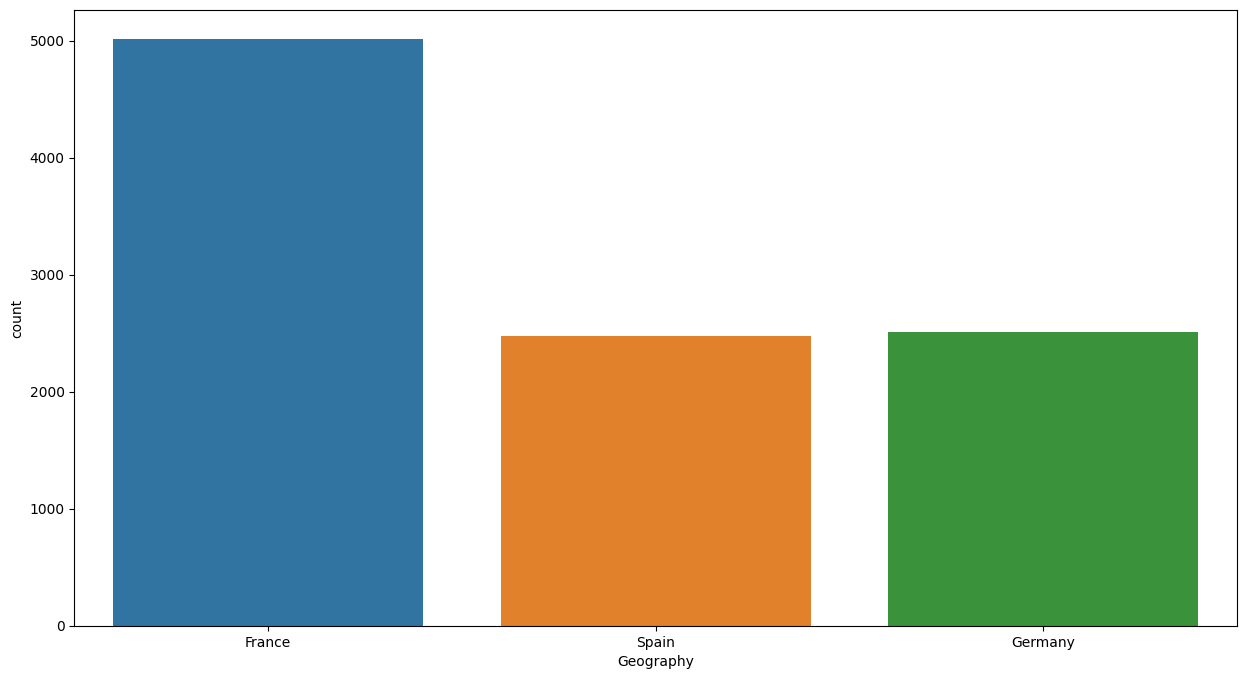

In [11]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.Geography)

<Axes: xlabel='Gender', ylabel='count'>

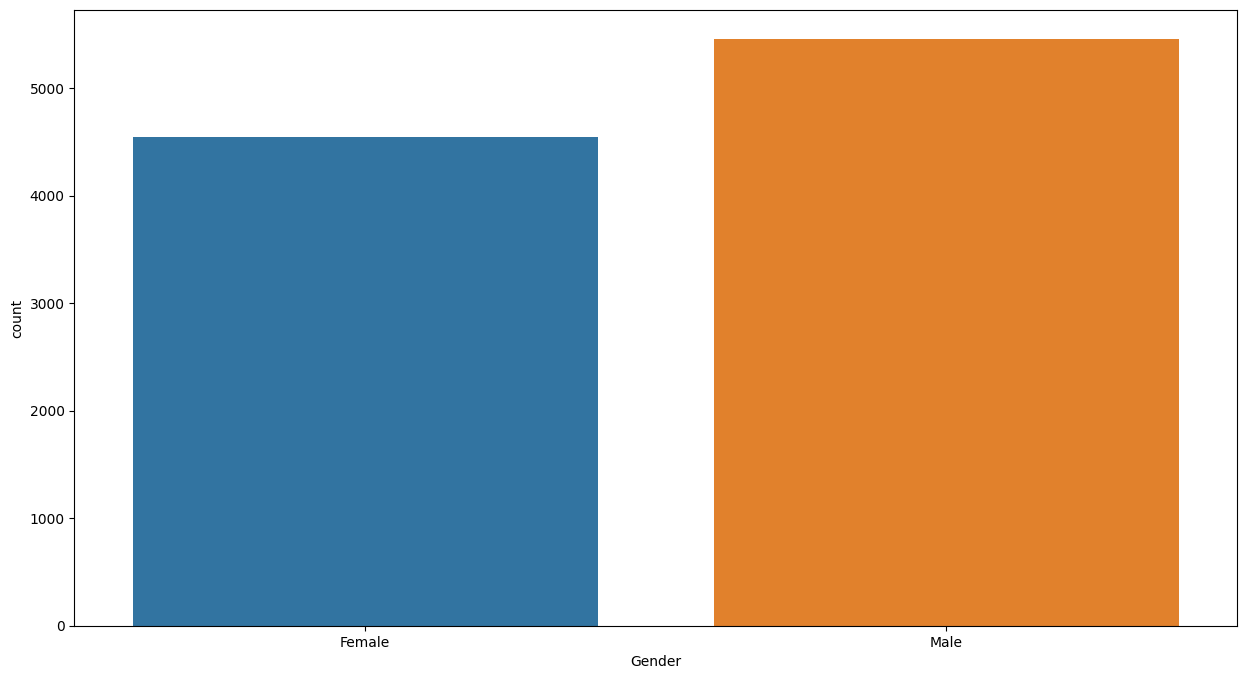

In [12]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.Gender)

<ipython-input-13-9bf333124161>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, fmt='.1g')


<Axes: >

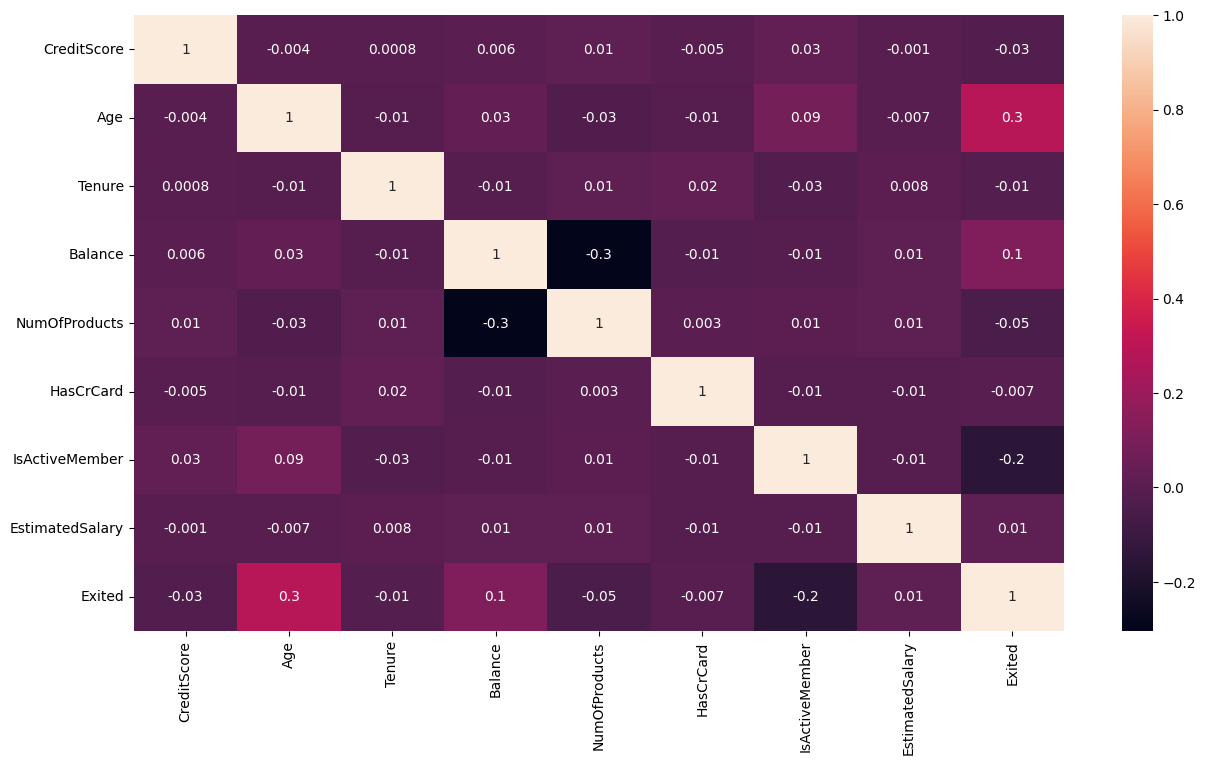

In [13]:
plt.figure(figsize=(15, 8))
sns.heatmap(data=df.corr(), annot=True, fmt='.1g')

<ipython-input-51-9732c3d1351e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.CreditScore)


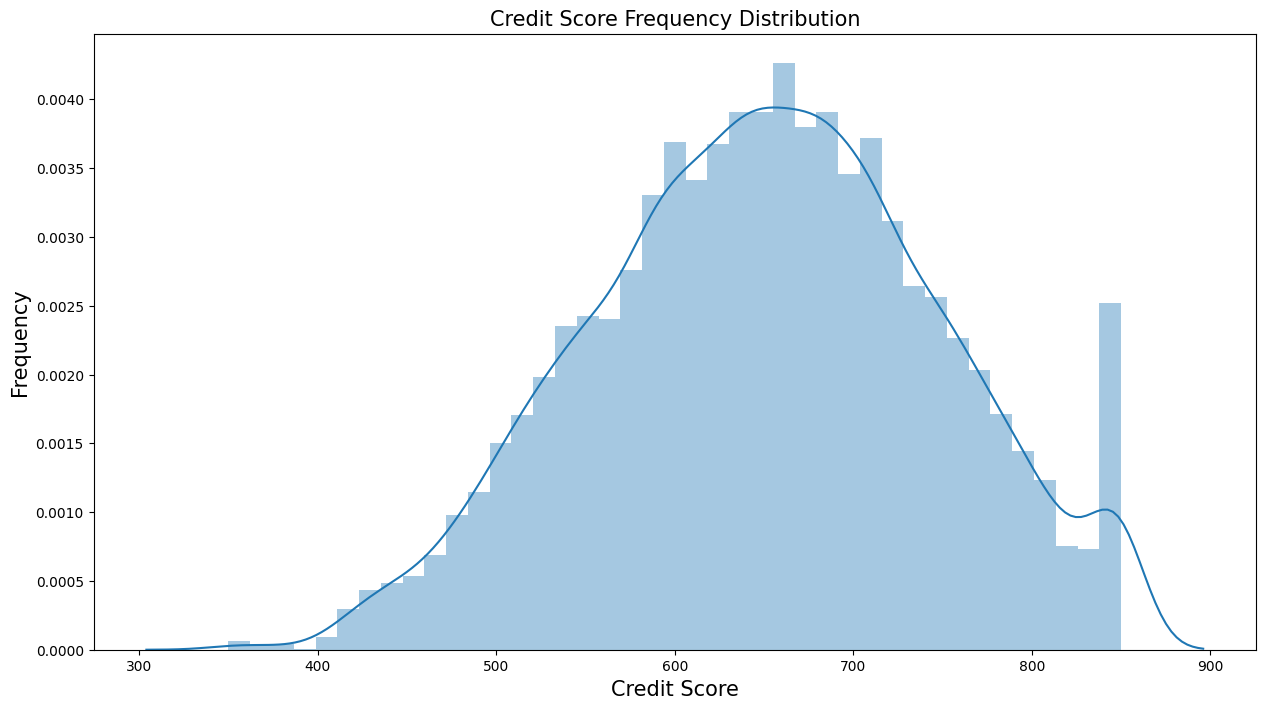

In [51]:
plt.figure(figsize=(15, 8))
sns.distplot(df.CreditScore)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Credit Score', fontsize=15)
plt.title('Credit Score Frequency Distribution', fontsize=15)
plt.show()

In [53]:
list(df.Geography.unique())

['France', 'Spain', 'Germany']

<Figure size 1500x800 with 0 Axes>

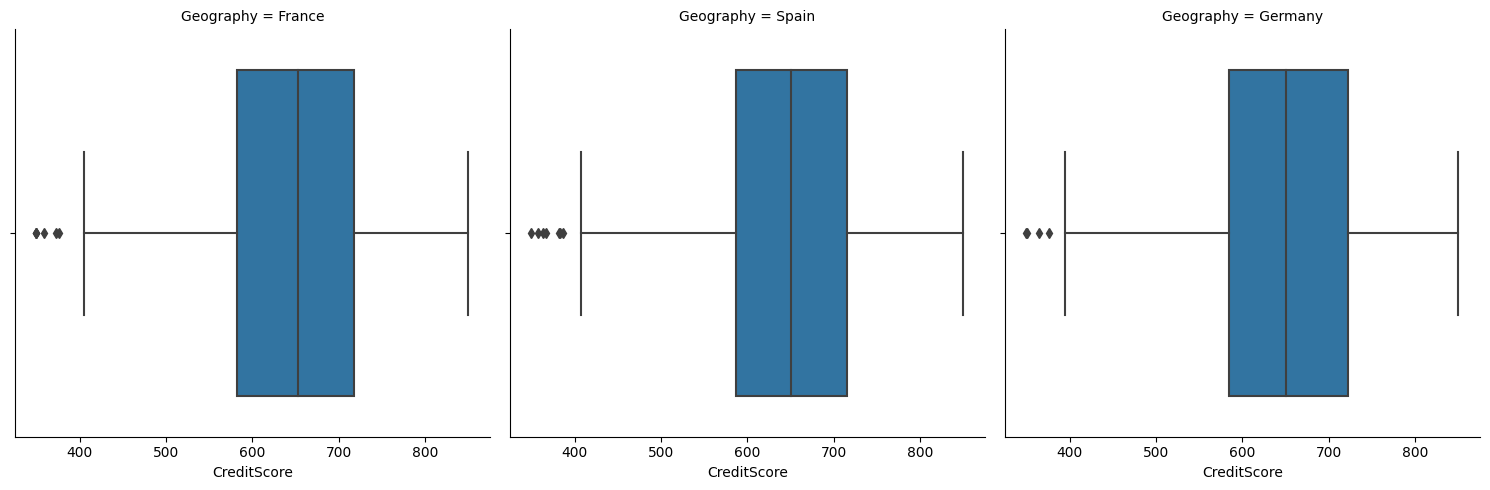

In [54]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='box', x='CreditScore', data=df, col='Geography')

<Figure size 1500x800 with 0 Axes>

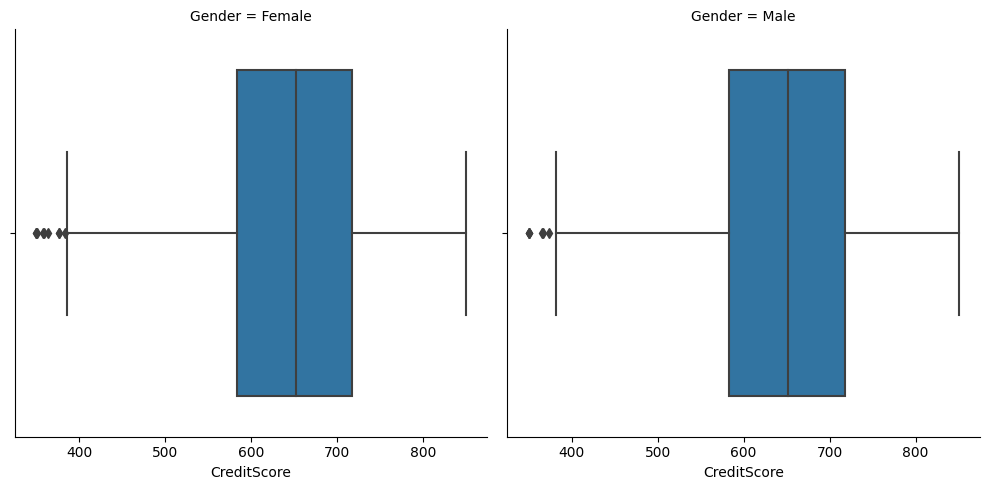

In [55]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='box', x='CreditScore', data=df, col='Gender')

<Axes: xlabel='CreditScore', ylabel='Age'>

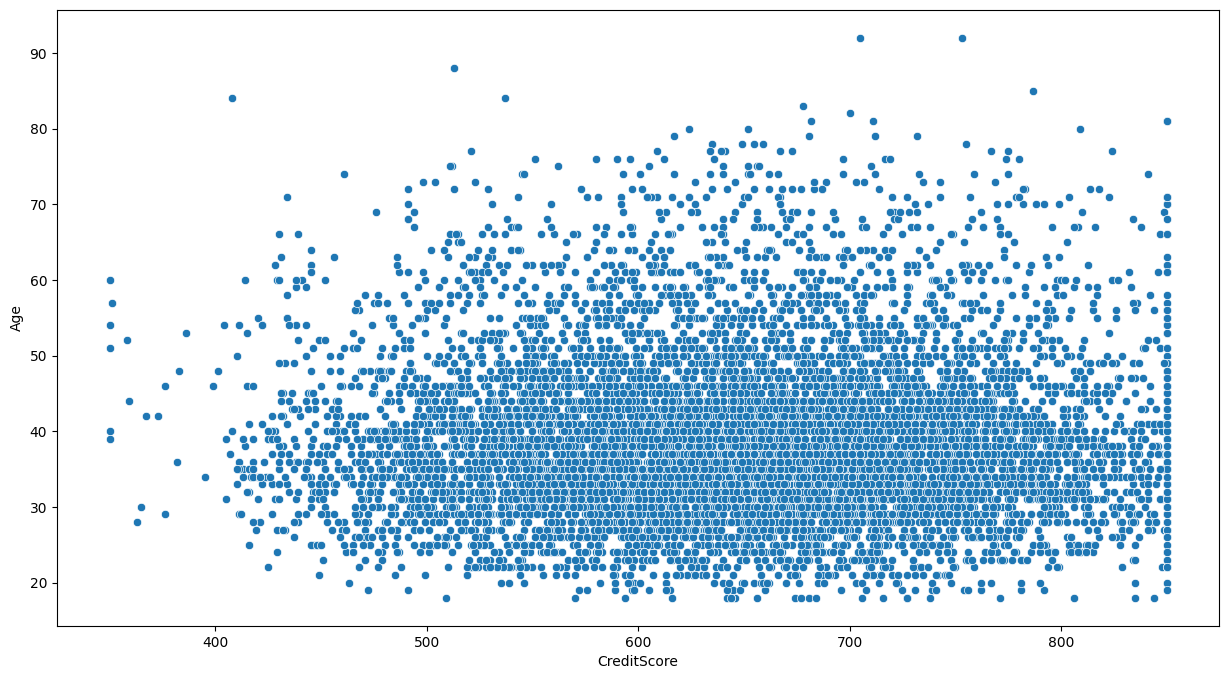

In [56]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='CreditScore', data=df, y='Age')

In [57]:
df[['Age', 'CreditScore']].corr()

,Age,CreditScore
Age,1.000000,-0.003965
CreditScore,-0.003965,1.000000


<Axes: xlabel='Exited', ylabel='count'>

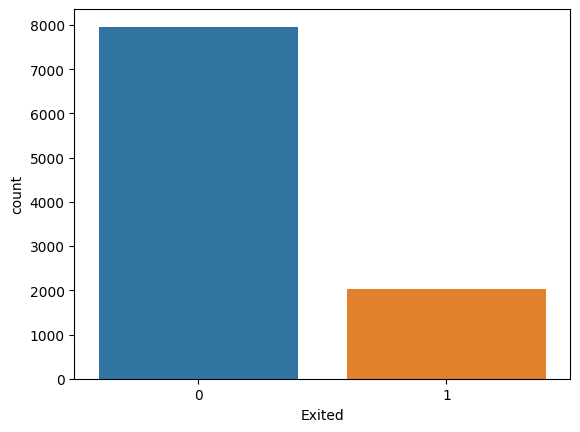

In [58]:
sns.countplot(x='Exited', data=df)

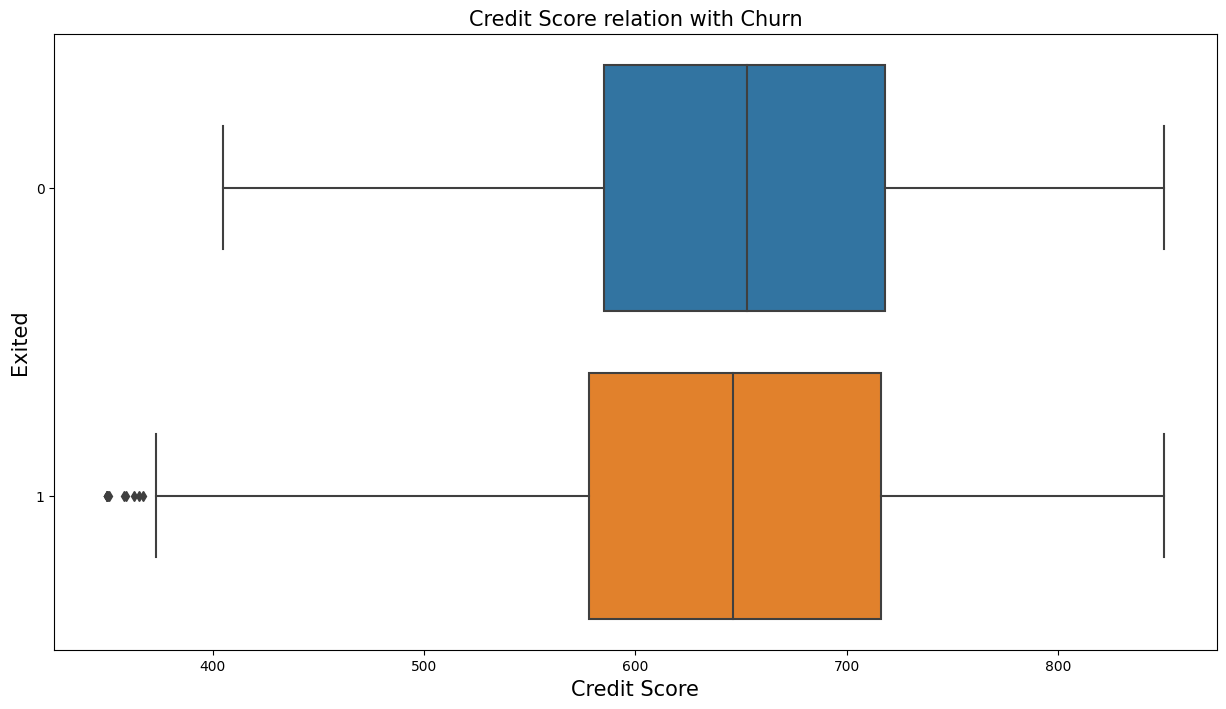

In [59]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='CreditScore', y='Exited', data=df, orient='h')
plt.xlabel('Credit Score', fontsize=15)
plt.ylabel('Exited', fontsize=15)
plt.title('Credit Score relation with Churn', fontsize=15)
plt.show()

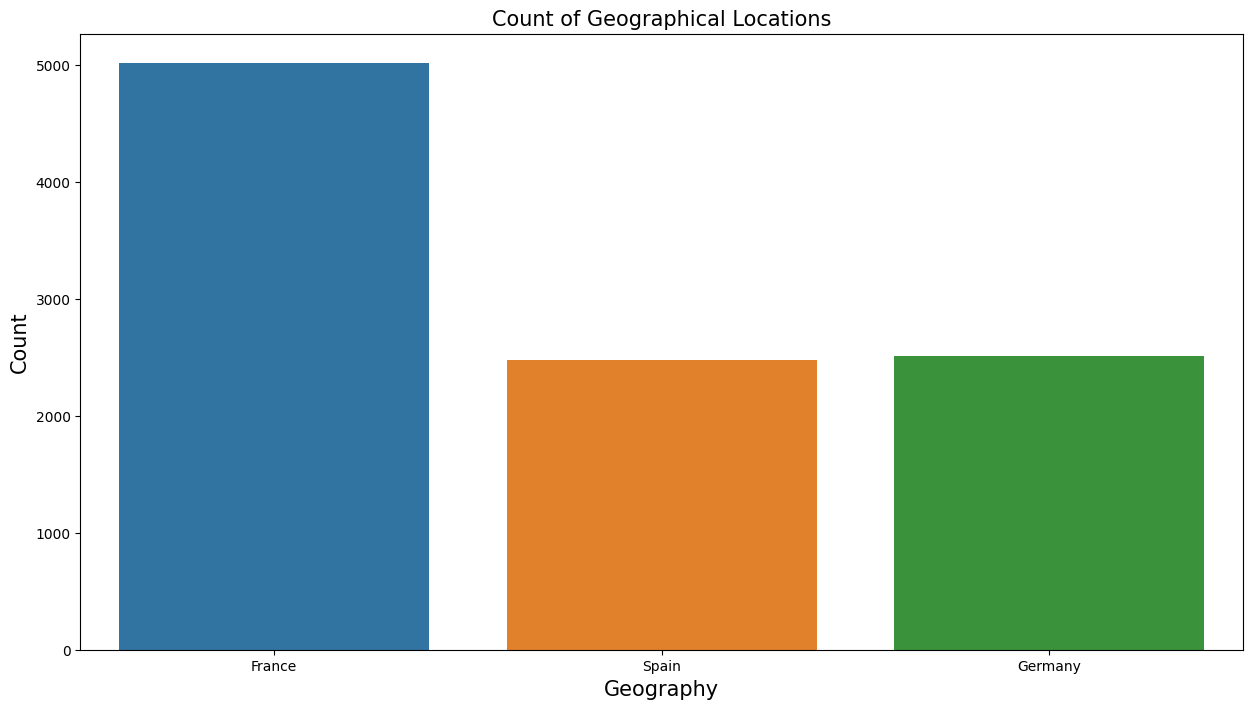

In [60]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.Geography)
plt.xlabel('Geography', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Geographical Locations', fontsize=15)
plt.show()

In [61]:
df[['Tenure', 'Geography']].dtypes

Tenure        int64
Geography    object
dtype: object

In [62]:
print('Unique years of tenures:', list(np.sort(df.Tenure.unique())))

Unique years of tenures: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Text(0, 0.5, 'Count')

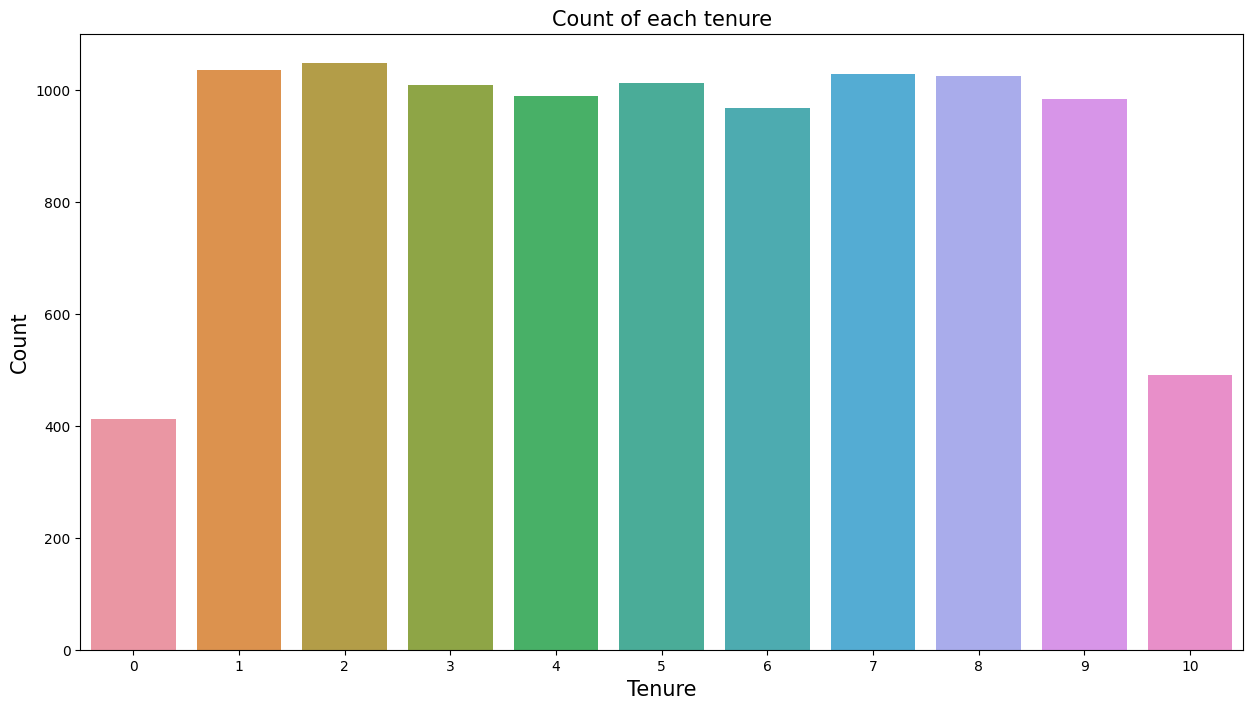

In [63]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.Tenure)
plt.title('Count of each tenure', fontsize=15)
plt.xlabel('Tenure', fontsize=15)
plt.ylabel('Count', fontsize=15)


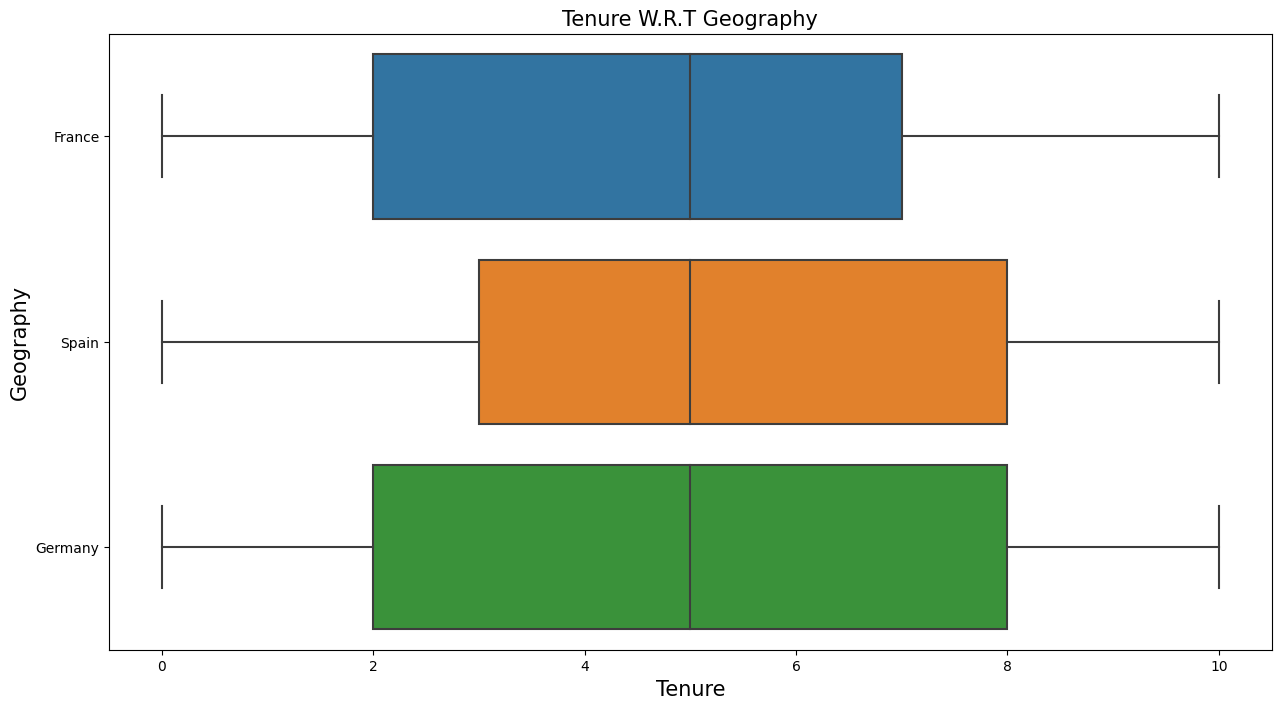

In [64]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Tenure', y='Geography', data=df)
plt.title('Tenure W.R.T Geography', fontsize=15)
plt.xlabel('Tenure', fontsize=15)
plt.ylabel('Geography', fontsize=15)
plt.show()

([<matplotlib.axis.YTick at 0x78e6fdbfbd60>,
 [Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3'), Text(0, 4, '4')])

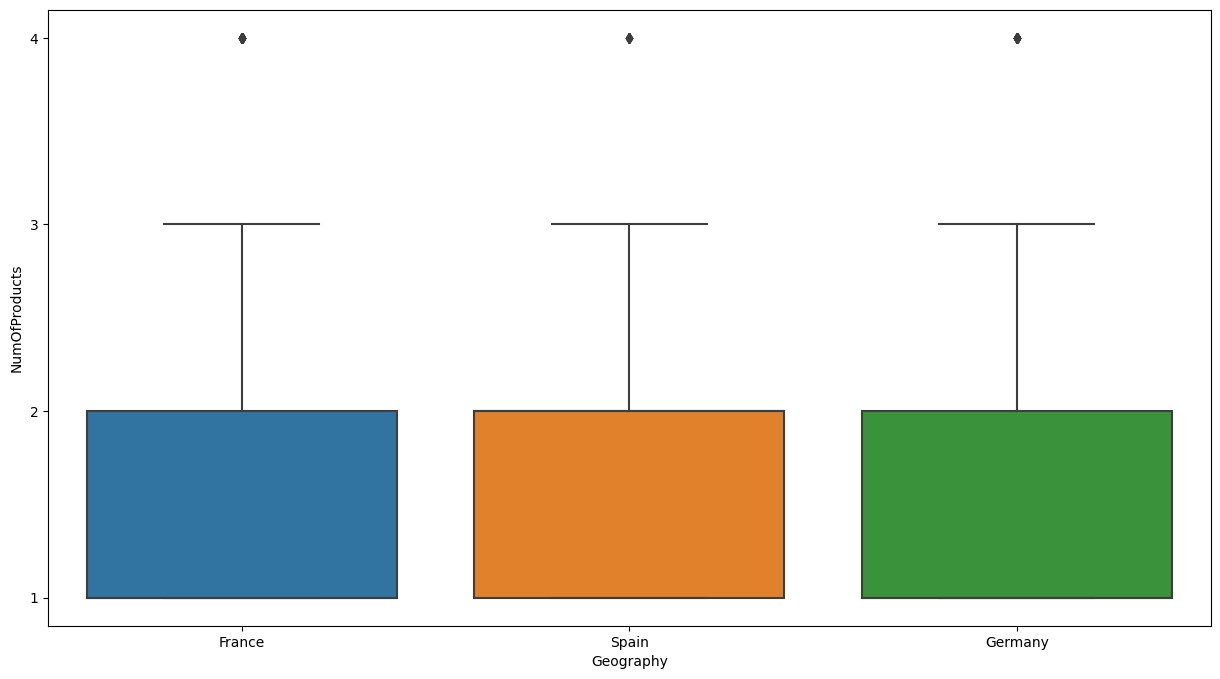

In [65]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Geography', y='NumOfProducts', data=df)
plt.yticks([1, 2, 3, 4])

<Figure size 1500x800 with 0 Axes>

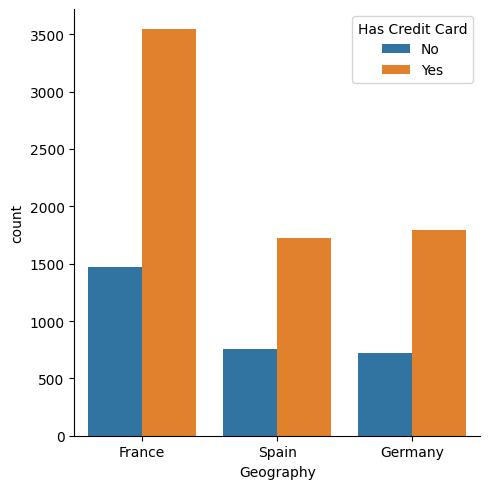

In [66]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='count', x='Geography', hue='HasCrCard', data=df, legend=False)
plt.legend(title='Has Credit Card', labels=['No', 'Yes'])
plt.show()

<Figure size 1500x800 with 0 Axes>

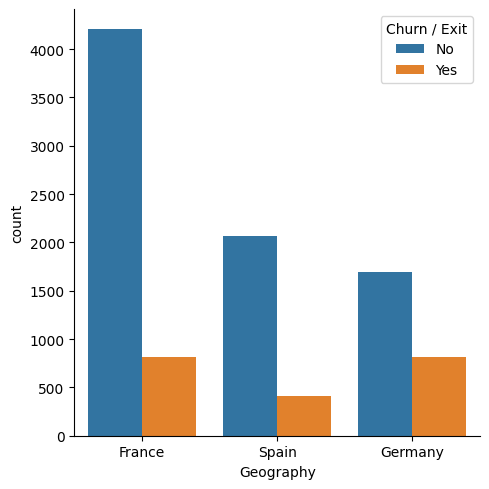

In [67]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='count', x='Geography', hue='Exited', data=df, legend=False)
plt.legend(title='Churn / Exit', labels=['No', 'Yes'])
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

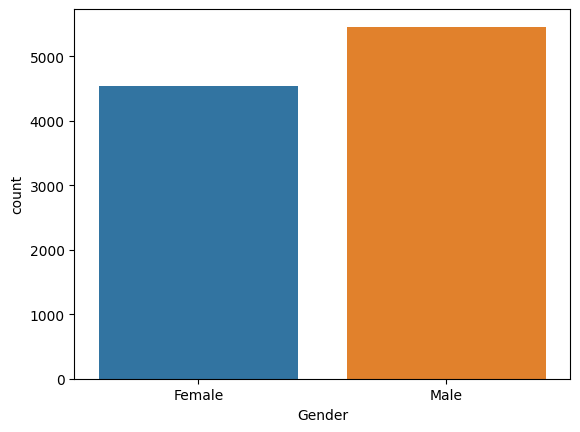

In [68]:
sns.countplot(x=df.Gender)

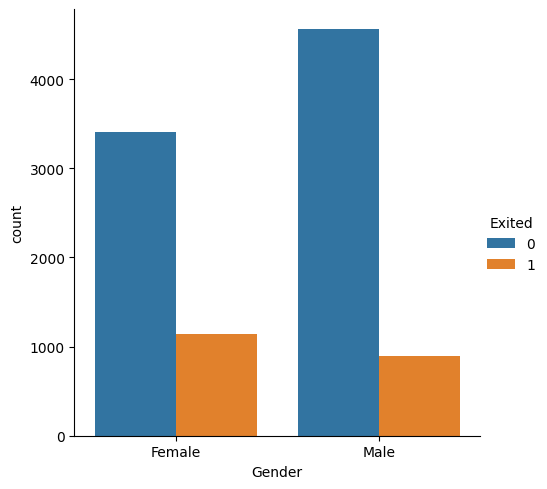

In [69]:
sns.catplot(x='Gender', hue='Exited', data=df, kind='count')

In [70]:
df.Age.dtype

dtype('int64')

In [71]:
np.sort(df.Age.unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       88, 92])

<Axes: xlabel='Age', ylabel='Exited'>

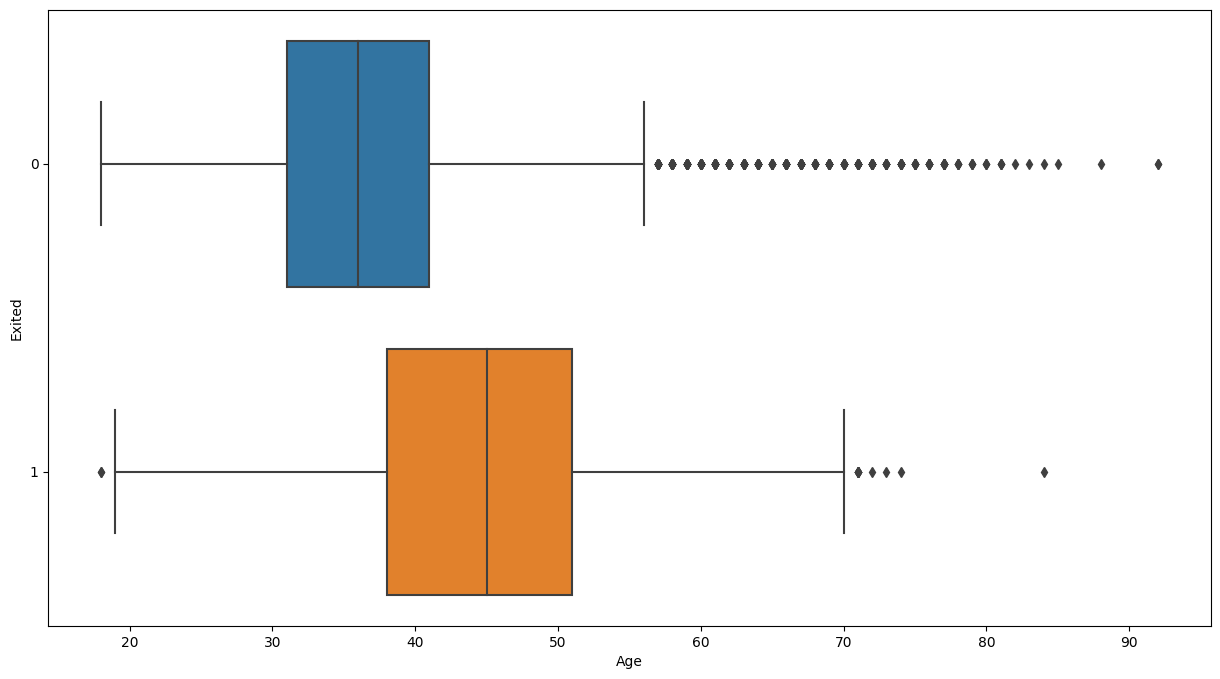

In [72]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=df.Age, y=df.Exited, orient='h')

Text(0, 0.5, 'Count')

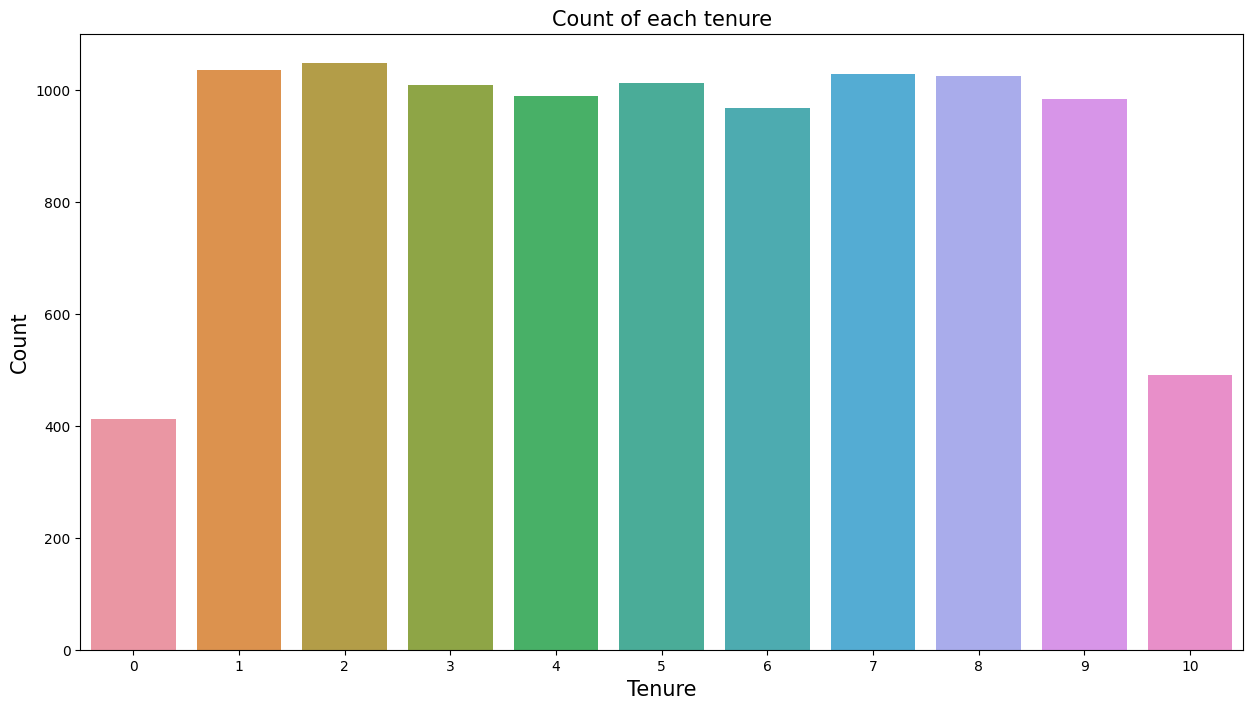

In [73]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.Tenure)
plt.title('Count of each tenure', fontsize=15)
plt.xlabel('Tenure', fontsize=15)
plt.ylabel('Count', fontsize=15)

<Axes: xlabel='Tenure', ylabel='Exited'>

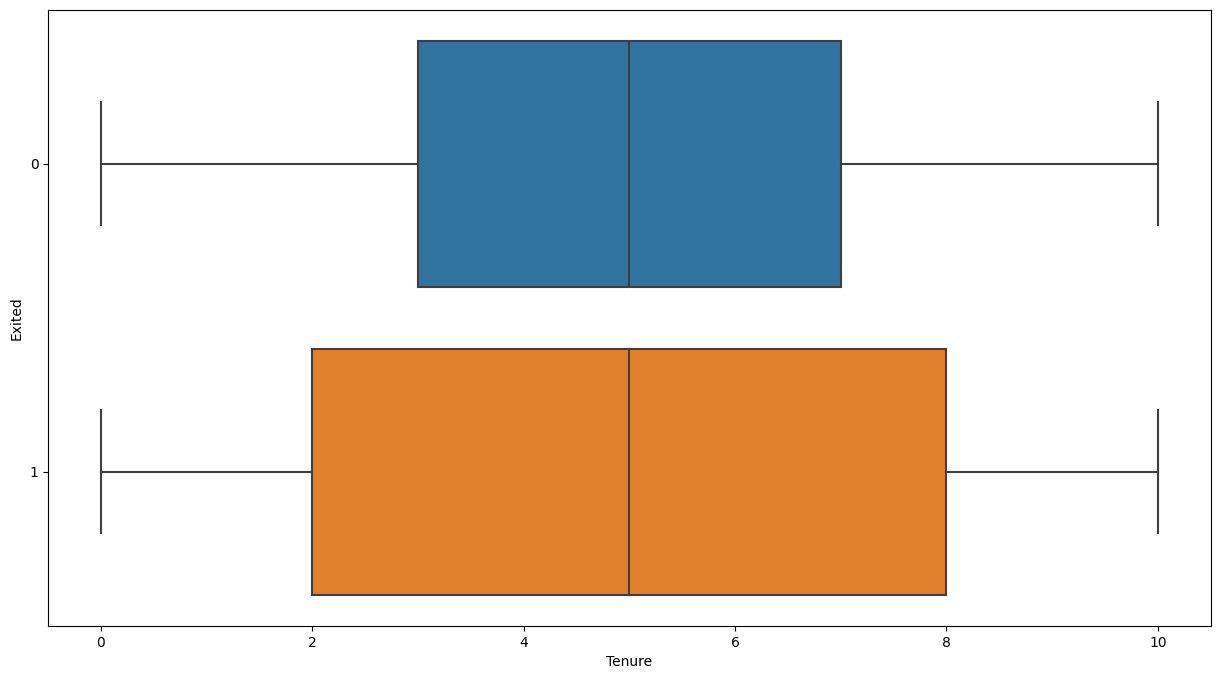

In [74]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Tenure', y='Exited', data=df, orient='h')

In [75]:
df.Balance.dtype

dtype('float64')

In [76]:
df.Balance.head(10)

0         0.00
1     83807.86
2    159660.80
3         0.00
4    125510.82
5    113755.78
6         0.00
7    115046.74
8    142051.07
9    134603.88
Name: Balance, dtype: float64

<Axes: xlabel='Balance', ylabel='Exited'>

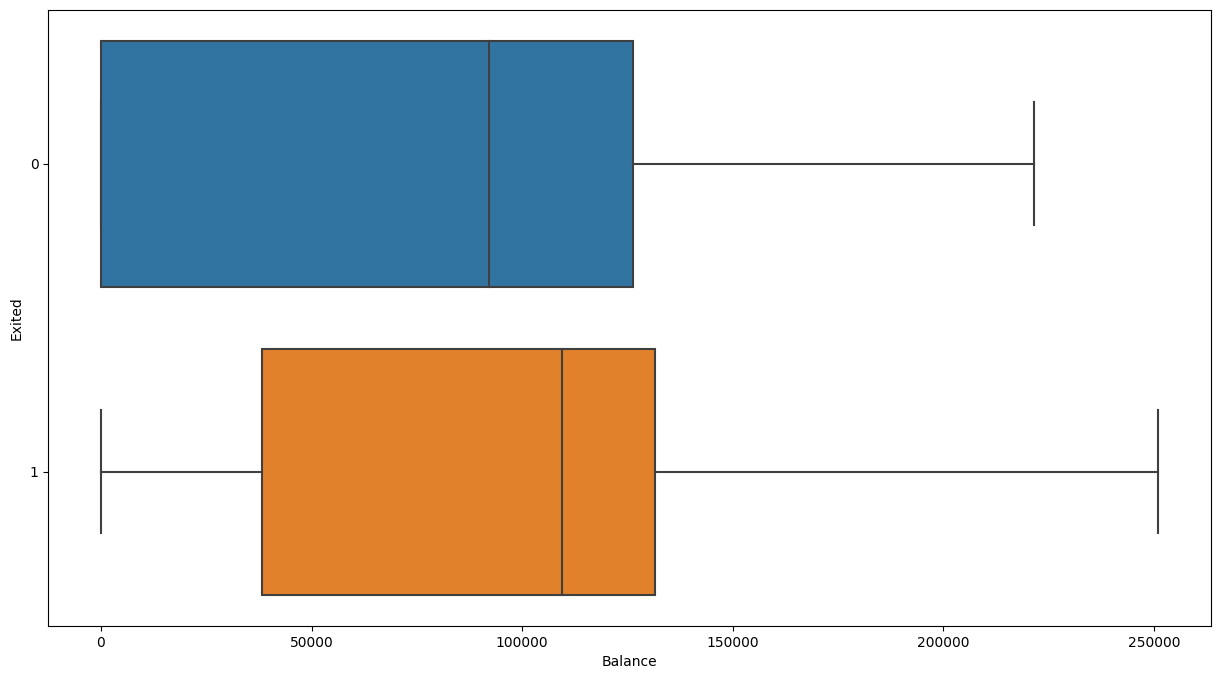

In [77]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Balance', y='Exited', data=df, orient='h')

In [78]:
df[['Balance', 'Exited']].corr()

,Balance,Exited
Balance,1.000000,0.118533
Exited,0.118533,1.000000


([<matplotlib.axis.YTick at 0x78e6f7faf130>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

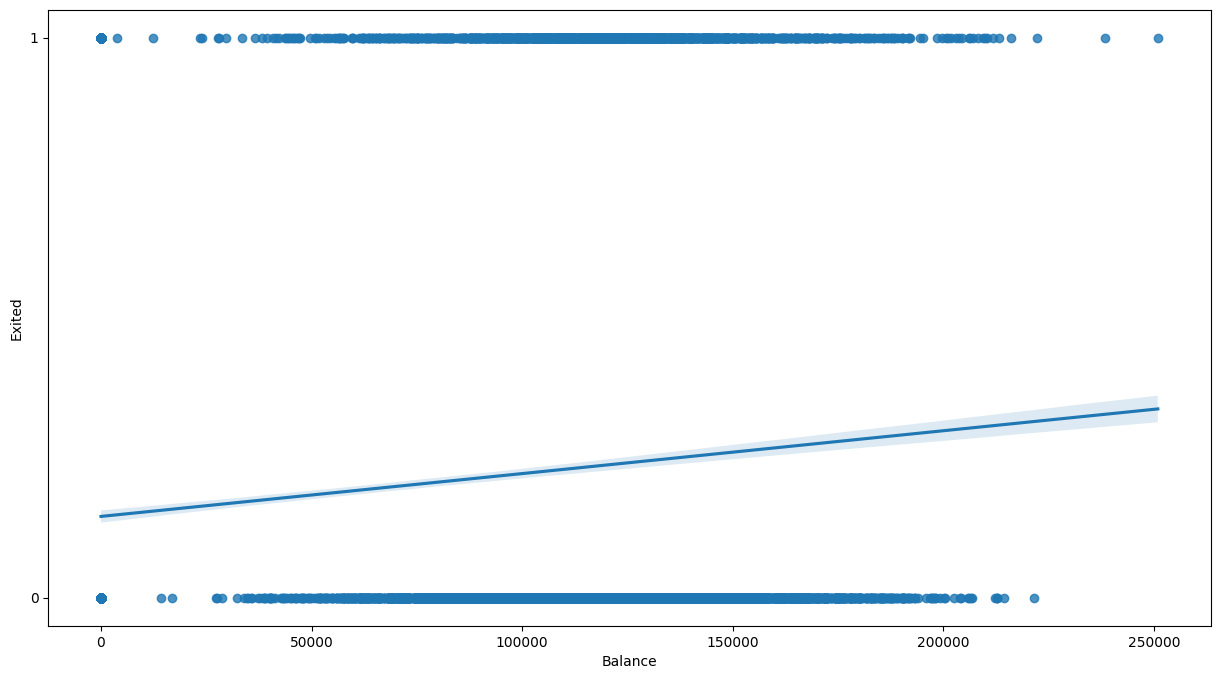

In [79]:
plt.figure(figsize=(15, 8))
sns.regplot(x=df.Balance, y=df.Exited)
plt.yticks([0, 1])

In [80]:
df.NumOfProducts.dtype

dtype('int64')

In [81]:
df.NumOfProducts.unique()

array([1, 3, 2, 4])

<Axes: xlabel='NumOfProducts', ylabel='count'>

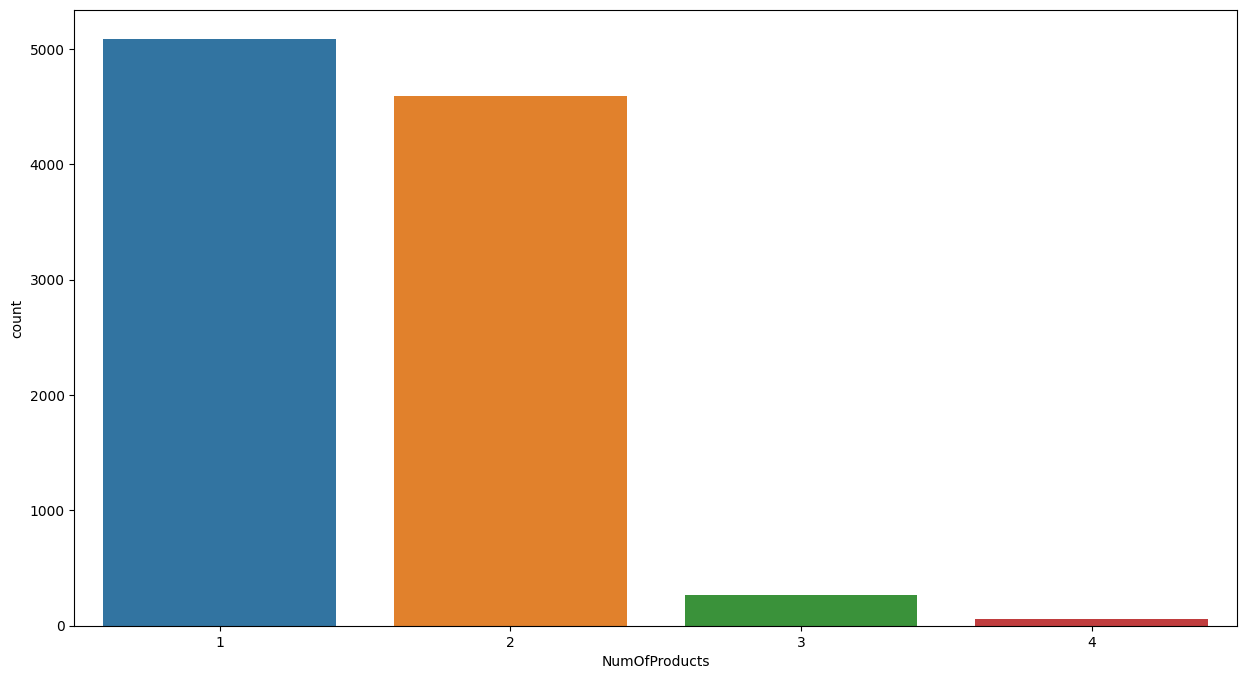

In [82]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.NumOfProducts)

<Axes: xlabel='NumOfProducts', ylabel='Exited'>

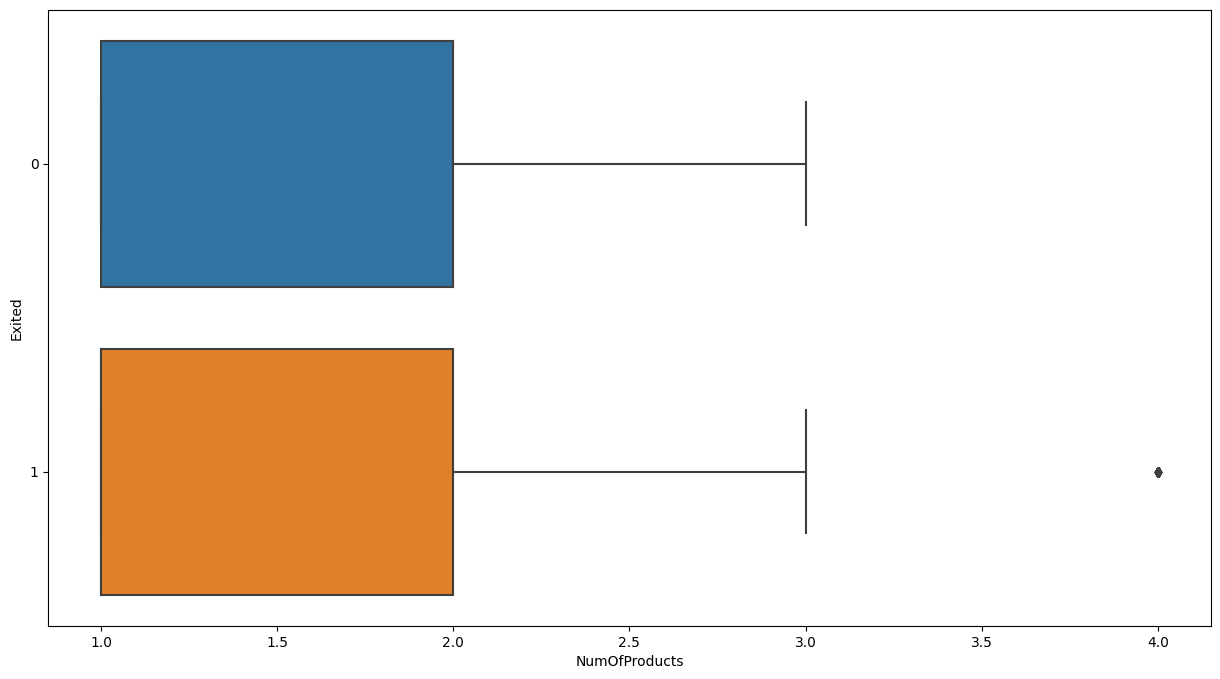

In [83]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=df.NumOfProducts, y=df.Exited, orient='h')


<Axes: xlabel='NumOfProducts', ylabel='Exited'>

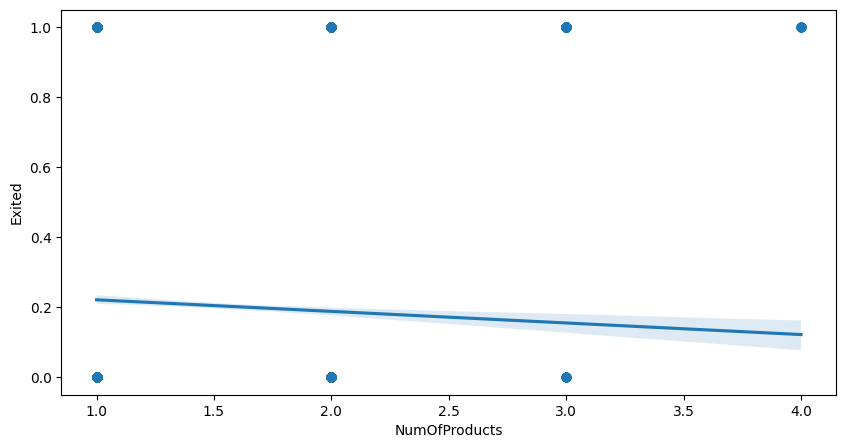

In [84]:
 plt.figure(figsize=(10, 5))
 sns.regplot(x=df.NumOfProducts, y=df.Exited)

In [85]:
df.HasCrCard.unique()

array([1, 0])

<Axes: xlabel='HasCrCard', ylabel='count'>

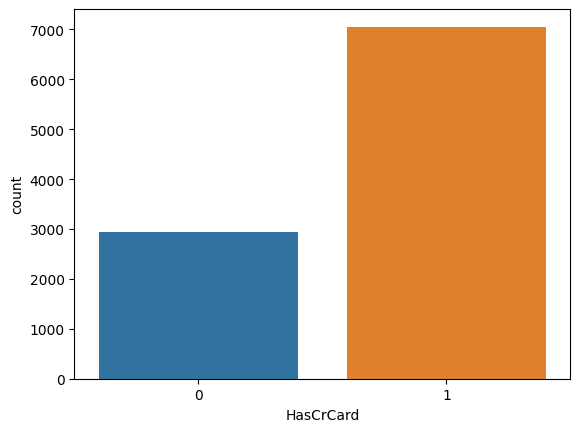

In [86]:
sns.countplot(x=df.HasCrCard)

<Figure size 1500x800 with 0 Axes>

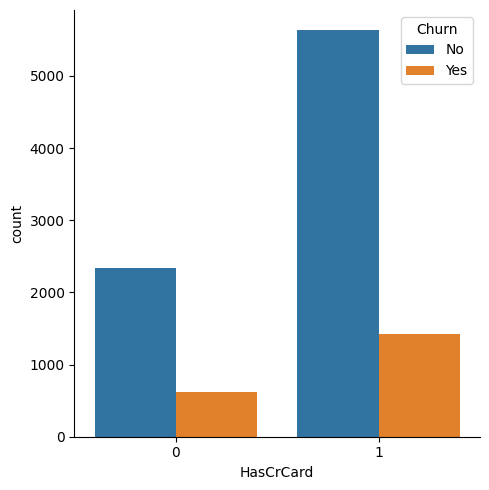

In [87]:
plt.figure(figsize=(15, 8))
sns.catplot(x='HasCrCard', hue='Exited', data=df, kind='count', legend=False)
plt.legend(title='Churn', labels=['No', 'Yes'])

In [88]:
df.IsActiveMember.dtype

dtype('int64')

In [89]:
df.IsActiveMember.unique()

array([1, 0])

<Figure size 1500x800 with 0 Axes>

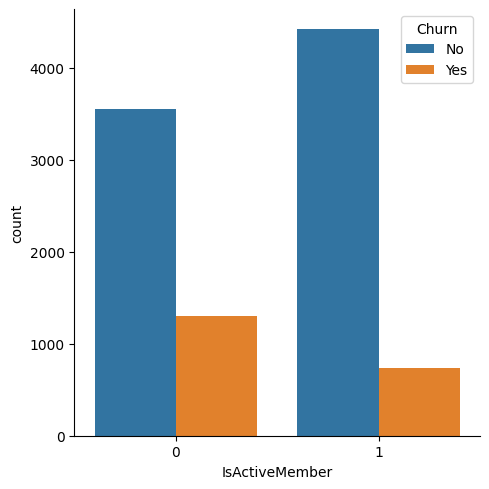

In [90]:
plt.figure(figsize=(15, 8))
sns.catplot(x='IsActiveMember', hue='Exited', data=df, kind='count', legend=False)
plt.legend(title='Churn', labels=['No', 'Yes'])

In [91]:
df.EstimatedSalary.dtype

dtype('float64')

<ipython-input-92-d025179ce49e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.EstimatedSalary)


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

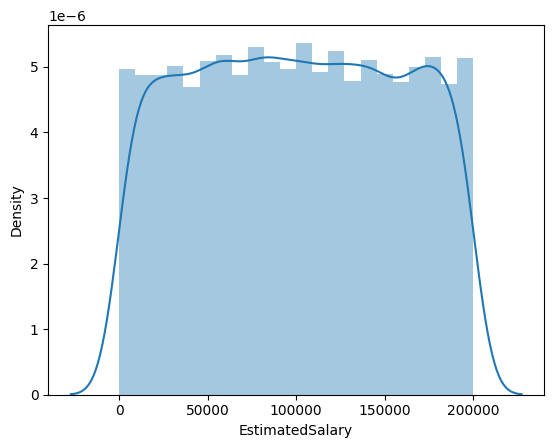

In [92]:
sns.distplot(df.EstimatedSalary)

<Axes: xlabel='EstimatedSalary', ylabel='Exited'>

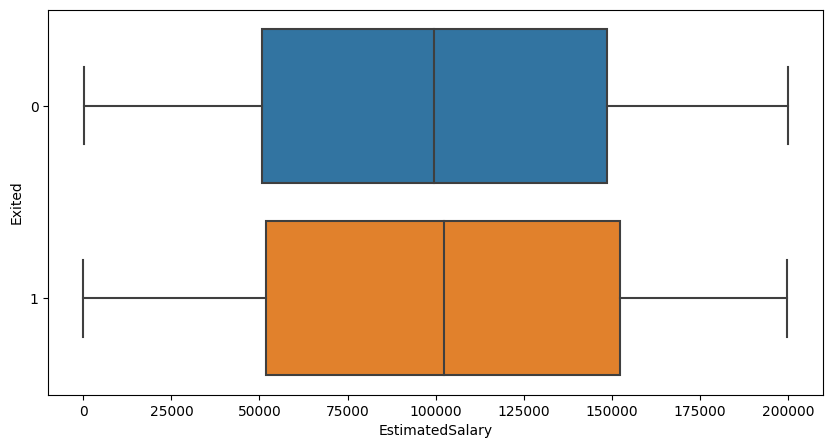

In [93]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df.EstimatedSalary, y=df.Exited, orient='h')